In [48]:
from keras.models import load_model
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [49]:
Train_Dir = 'input/training/training.csv'
Test_Dir = 'input/test/test.csv'
lookid_dir = 'input/IdLookupTable_test.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

In [50]:
model = load_model('pepp-FKD.h5')
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [51]:
test_img_gs = cv2.imread('face_min.jpg',0)
print(test_img_gs)

[[ 77  81  94 ...  80  79  74]
 [ 68  69  80 ...  92  89  89]
 [ 63  61  64 ... 104 100 109]
 ...
 [ 69  81  99 ...  28  72 102]
 [ 68  82  95 ...  16   2   0]
 [ 68  87 102 ...  24  24  24]]


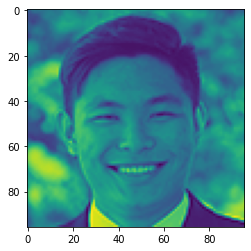

In [52]:
plt.imshow(test_img_gs)
plt.show()

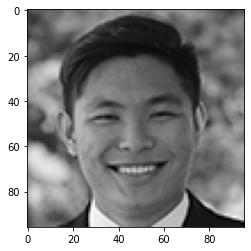

In [53]:
plt.imshow(test_img_gs, cmap='gray')
plt.show()

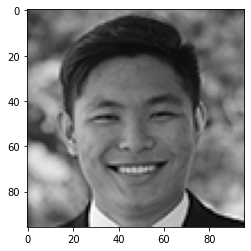

In [54]:
timag = []
timag.append(test_img_gs)
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1)
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [81]:
pred = model.predict(X_test)

In [77]:
print(pred)

[[56.24068  35.408623 29.97886  35.161263 55.216442 34.30904  68.68584
  33.364155 35.951225 36.9276   22.631222 37.09073  51.055897 28.297806
  74.65568  27.144293 37.060555 31.151146 15.826983 32.23605  40.52168
  51.55503  66.31712  67.1956   32.26156  70.84987  48.09546  69.56928
  41.143845 61.95549 ]]


In [63]:
print(pre_list)

[array([56.24068 , 35.408623, 29.97886 , 35.161263, 55.216442, 34.30904 ,
       68.68584 , 33.364155, 35.951225, 36.9276  , 22.631222, 37.09073 ,
       51.055897, 28.297806, 74.65568 , 27.144293, 37.060555, 31.151146,
       15.826983, 32.23605 , 40.52168 , 51.55503 , 66.31712 , 67.1956  ,
       32.26156 , 70.84987 , 48.09546 , 69.56928 , 41.143845, 61.95549 ],
      dtype=float32)]


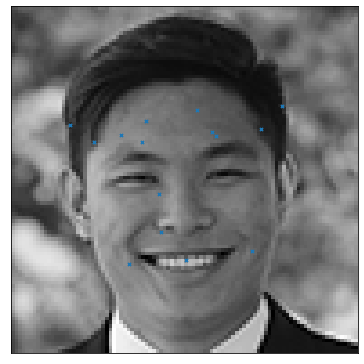

In [76]:
def plot_sample_list(x, y, axis, idx):
    img = x[idx].reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[idx][0::2], y[idx][1::2], marker='x', s=10)

def show_images_more(num, idx):
    fig = plt.figure(figsize=(20, 20))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) ##页面子图的布局调整
    for i in range(num):
        axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        plot_sample_list(X_test, pre_list, axis, i+idx) ###x_test_bzh, (test_x) y_predict(predicted)
        plt.show()

show_images_more(1, 0)